In [ ]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visulatization
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Read in data
ratings=pd.read_csv('ratings.csv')

# Take a look at the data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Get the dataset information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
# Number of users
print( 'The ratings dataset has', ratings['User-ID'].nunique(), 'unique users')

# Number of books
print( 'The ratings dataset has', ratings['ISBN'].nunique(), 'unique books')

# Number of ratings
print( 'The ratings dataset has', ratings['Book-Rating'].nunique(), 'Book-Rating')

# Number of unique ratings
print( 'The unique ratings are', sorted(ratings['Book-Rating'].unique()))

In [ ]:
# Read in data
books=pd.read_csv('books.csv')

# Take a look at the data
books.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Merge ratings and books datasets
df = pd.merge(ratings, books, on='ISBN', how='inner')

# Take a look at the data
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
# Aggregate by book
agg_ratings = df.groupby('Book-Title').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()

# Keep the movies with over 100 ratings
agg_ratings_GT100 = agg_ratings[agg_ratings['number_of_ratings']>100]
agg_ratings_GT100.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 764 to 240860
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book-Title         904 non-null    object 
 1   mean_rating        904 non-null    float64
 2   number_of_ratings  904 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.2+ KB


In [ ]:
# Check popular books
agg_ratings_GT100.sort_values(by='number_of_ratings', ascending=False).head()

,Book-Title,mean_rating,number_of_ratings
234951,Wild Animus,1.019584,2502
196326,The Lovely Bones: A Novel,4.468726,1295
183573,The Da Vinci Code,4.642539,898
5303,A Painted House,3.231504,838
199237,The Nanny Diaries: A Novel,3.530193,828


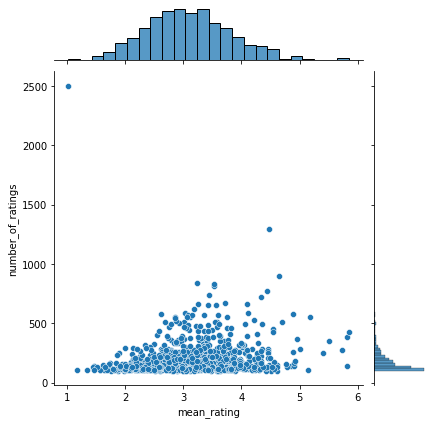

In [ ]:
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT100)

In [ ]:
# Merge data
df_GT100 = pd.merge(df, agg_ratings_GT100[['Book-Title']], on='Book-Title', how='inner')
df_GT100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182799 entries, 0 to 182798
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              182799 non-null  int64 
 1   ISBN                 182799 non-null  object
 2   Book-Rating          182799 non-null  int64 
 3   Book-Title           182799 non-null  object
 4   Book-Author          182799 non-null  object
 5   Year-Of-Publication  182799 non-null  object
 6   Publisher            182799 non-null  object
 7   Image-URL-S          182799 non-null  object
 8   Image-URL-M          182799 non-null  object
 9   Image-URL-L          182799 non-null  object
dtypes: int64(2), object(8)
memory usage: 15.3+ MB


In [ ]:
# Number of users
print('The ratings dataset has', df_GT100['User-ID'].nunique(), 'unique users')

# Number of movies
print('The ratings dataset has', df_GT100['Book-Title'].nunique(), 'unique books')

# Number of ratings
print('The ratings dataset has', df_GT100['Book-Rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df_GT100['Book-Rating'].unique()))

The ratings dataset has 38014 unique users
The ratings dataset has 904 unique books
The ratings dataset has 11 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Create user-item matrix
matrix = df_GT100.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
matrix.head()

Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# User similarity matrix using cosine similarity
# user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
# user_similarity_cosine

In [ ]:
# Pick a user ID
picked_userid = 9

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

User-ID,8,9,14,16,17,26,32,39,42,44,...,278819,278820,278824,278828,278832,278836,278843,278844,278846,278854
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 9 are User-ID
11676    1.0
58363    1.0
Name: 9, dtype: float64


In [ ]:
# Books that the target user ranked
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

Book-Title,Beloved (Plume Contemporary Fiction),The Testament
User-ID,,
9,3.0,-3.0


In [ ]:
# Books that similar users read. Remove books that none of the similar users have read
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_books

Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
11676,-1.927018,3.739649,-1.260351,2.239649,3.072982,-5.260351,1.239649,3.739649,-5.260351,-1.760351,...,-1.260351,4.739649,-5.260351,2.239649,-1.927018,-5.260351,0.739649,1.739649,1.739649,-1.760351
58363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove the books that have been read from the book list
similar_user_books.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_books

Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
11676,-1.927018,3.739649,-1.260351,2.239649,3.072982,-5.260351,1.239649,3.739649,-5.260351,-1.760351,...,-1.260351,4.739649,-5.260351,2.239649,-1.927018,-5.260351,0.739649,1.739649,1.739649,-1.760351
58363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_books.columns:
  # Get the ratings for book i
  book_rating = similar_user_books[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the movie has rating
    if pd.isna(book_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the movie rating
      score = similar_users[u] * book_rating[u]
      # Add the score to the total score for the movie so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['Book-Title', 'Book-Rating'])
    
# Sort the movies by score
ranked_item_score = item_score.sort_values(by='Book-Rating', ascending=False)

# Select top m movies
m = 10
ranked_item_score.head(m)

,Book-Title,Book-Rating
282,Illusions: The Adventures of a Reluctant Messiah,4.739649
293,Ishmael: An Adventure of the Mind and Spirit,4.739649
132,Confessions of a Shopaholic (Summer Display Op...,4.739649
65,At Home in Mitford (The Mitford Years),4.739649
283,In Her Shoes : A Novel,4.739649
708,The Shipping News : A Novel,4.739649
458,Scarlett : The Sequel to Margaret Mitchell's \...,4.739649
60,Animal Farm,4.739649
175,Dr. Death (Alex Delaware Novels (Paperback)),4.739649
58,"Angus, Thongs and Full-Frontal Snogging: Confe...",4.739649


In [ ]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average book rating for user 1
print(f'The average book rating for user {picked_userid} is {avg_rating:.2f}')

The average book rating for user 9 is 3.00


In [ ]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['Book-Rating'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)

,Book-Title,Book-Rating,predicted_rating
282,Illusions: The Adventures of a Reluctant Messiah,4.739649,7.739649
293,Ishmael: An Adventure of the Mind and Spirit,4.739649,7.739649
132,Confessions of a Shopaholic (Summer Display Op...,4.739649,7.739649
65,At Home in Mitford (The Mitford Years),4.739649,7.739649
283,In Her Shoes : A Novel,4.739649,7.739649
708,The Shipping News : A Novel,4.739649,7.739649
458,Scarlett : The Sequel to Margaret Mitchell's \...,4.739649,7.739649
60,Animal Farm,4.739649,7.739649
175,Dr. Death (Alex Delaware Novels (Paperback)),4.739649,7.739649
58,"Angus, Thongs and Full-Frontal Snogging: Confe...",4.739649,7.739649
